In [1]:
import pandas as pd
train = pd.read_csv('train.csv') # Train Data Input
val = pd.read_csv('validation.csv') # Validation Data Input
test = pd.read_csv('test.csv') # Test Data Input
# e로 나타내지 말고 상수로 나타내달라는 명령어
pd.options.display.float_format = '{:.5f}'.format

/var/folders/k3/rms2bm6x6bd1fh563_l6jrfr0000gn/T/ipykernel_4150/1284512434.py:2: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv') # Train Data Input


In [2]:
train["set"] = 1 
val["set"] = 2 
test["set"] = 3 

sub = pd.concat([train,val,test], axis = 0)
sub = sub.reset_index()
sub.pop('index')
sub2 = sub.copy() 

main = pd.DataFrame() 
copy_cols=['id','set','fr_yn']
main[copy_cols] = sub[copy_cols]

In [3]:
ele_info =sub[sub.columns[sub.columns.map(lambda x : x.startswith('ele'))]] 
gas_info = sub[sub.columns[sub.columns.map(lambda x : x.startswith('gas'))]]
lw_info = sub[sub.columns[sub.columns.map(lambda x : x.startswith('lw'))]]

sub = sub[sub.columns[sub.columns.map(lambda x : True if not x.startswith("ele") else False)]]
sub = sub[sub.columns[sub.columns.map(lambda x : True if not x.startswith("gas") else False)]]
sub = sub[sub.columns[sub.columns.map(lambda x : True if not x.startswith("lw") else False)]]

ele_info['isele'] = ele_info.median(axis=1)
gas_info['isgas'] = gas_info.median(axis=1)
lw_info['islw'] = lw_info.median(axis=1)

sub['isele'] = ele_info['isele']
sub['isgas'] = gas_info['isgas']
sub['islw'] = lw_info['islw']

In [4]:
sub = sub.drop(['prcpttn',
'fr_fghtng_fclt_spcl_css_5_yn',
'fr_fghtng_fclt_spcl_css_6_yn',
'blk_dngrs_thng_mnfctr_yn',
'cltrl_hrtg_yn',
'dngrs_thng_yn',
'slf_fr_brgd_yn',
'bldng_us',
'isgas',
'lnd_us_sttn_nm',
'rgnl_ar_nm',
'rgnl_ar_nm2',
'emd_nm',
'bldng_cnt_in_50m'], axis = 1)

In [5]:
sub.head()

,dt_of_fr,fr_yn,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,trgt_crtr,us_yn,set,isele,islw
0,2017-10-20 05:54,Y,블록구조,3,69.42000,69.42000,0.00000,1977.00000,1.00000,0.00000,...,0,1891,29231,11322,88,NaN,NaN,1,0.00000,NaN
1,2018-09-30 08:26,N,NaN,3,46.29000,46.29000,0.00000,NaN,1.00000,0.00000,...,0,4533,20480,3369,7727,NaN,NaN,1,NaN,NaN
2,2016-10-30 14:57,Y,철근콘크리트구조,1,583.80000,2516.76000,1446.00000,20001104.00000,5.00000,0.00000,...,0,277,31197,12451,72,NaN,NaN,1,0.00000,NaN
3,2016-06-14 05:23,N,일반목구조,2,48.92000,48.92000,0.00000,1936.00000,1.00000,0.00000,...,0,438,4270,407,508,NaN,NaN,1,0.00000,NaN
4,2018-04-22 05:38,N,NaN,2,0.00000,0.00000,0.00000,NaN,NaN,NaN,...,0,1702,29778,12487,707,NaN,NaN,1,NaN,NaN


In [6]:
sub.columns.tolist()

['dt_of_fr',
 'fr_yn',
 'bldng_archtctr',
 'bldng_cnt',
 'bldng_ar',
 'ttl_ar',
 'lnd_ar',
 'dt_of_athrztn',
 'ttl_grnd_flr',
 'ttl_dwn_flr',
 'bldng_us_clssfctn',
 'tmprtr',
 'wnd_spd',
 'wnd_drctn',
 'hmdt',
 'jmk',
 'id',
 'rd_sd_nm',
 'hm_cnt',
 'fr_sttn_dstnc',
 'bldng_ar_prc',
 'fr_wthr_fclt_dstnc',
 'fr_mn_cnt',
 'mlt_us_yn',
 'cctv_dstnc',
 'fr_wthr_fclt_in_100m',
 'cctv_in_100m',
 'tbc_rtl_str_dstnc',
 'sft_emrgnc_bll_dstnc',
 'ahsm_dstnc',
 'no_tbc_zn_dstnc',
 'trgt_crtr',
 'us_yn',
 'set',
 'isele',
 'islw']

In [7]:
sub2 = sub.drop(['dt_of_fr','bldng_archtctr',
 'bldng_cnt',
 'bldng_ar',
 'ttl_ar',
 'lnd_ar',
 'dt_of_athrztn',
 'ttl_grnd_flr',
 'ttl_dwn_flr',
 'bldng_us_clssfctn',
 'tmprtr',
 'wnd_spd',
 'wnd_drctn',
 'hmdt',
 'jmk',
 'id',
 'rd_sd_nm',
 'hm_cnt',
 'fr_sttn_dstnc','fr_wthr_fclt_dstnc',
 'fr_mn_cnt',
 'mlt_us_yn',
 'cctv_dstnc',
 'fr_wthr_fclt_in_100m',
 'cctv_in_100m',
 'tbc_rtl_str_dstnc',
 'sft_emrgnc_bll_dstnc',
 'ahsm_dstnc',
 'no_tbc_zn_dstnc',
 'trgt_crtr',
 'us_yn',
 'set',
 'isele',
 'islw'],axis = 1)

In [8]:
sub2.head(300)

,fr_yn,bldng_ar_prc
0,Y,NaN
1,N,122581.00000
2,Y,618105.00000
3,N,719542.00000
4,N,NaN
...,...,...
295,N,NaN
296,N,209468.00000
297,N,NaN
298,N,229237.00000


In [9]:
import pandas as pd

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [10]:
sub2.head(300)

,fr_yn,bldng_ar_prc
0,Y,NaN
1,N,122581.00000
2,Y,618105.00000
3,N,719542.00000
4,N,NaN
5,Y,899087.00000
6,N,NaN
7,N,233594.00000
8,N,NaN
9,N,NaN


In [11]:
sub3 = sub2.replace({'Y': 1, 'N': 0},inplace = False)

In [12]:
sub3 = sub3.dropna()

In [13]:
sub3.corr()

,fr_yn,bldng_ar_prc
fr_yn,1.00000,0.04674
bldng_ar_prc,0.04674,1.00000


In [14]:
sub3.head(500)

,fr_yn,bldng_ar_prc
1,0.00000,122581.00000
2,1.00000,618105.00000
3,0.00000,719542.00000
5,1.00000,899087.00000
7,0.00000,233594.00000
10,1.00000,263117.00000
11,0.00000,918390.00000
12,1.00000,684034.00000
13,0.00000,652729.00000
14,1.00000,751210.00000


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

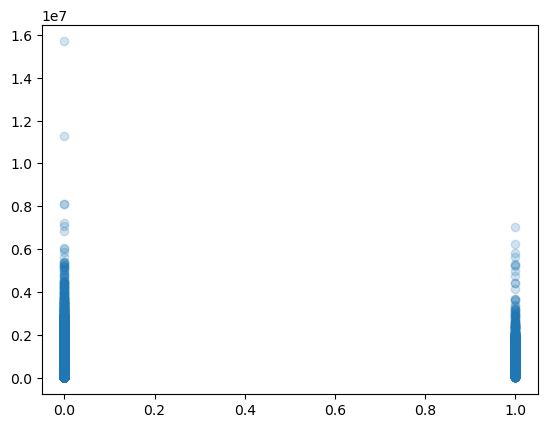

In [16]:
X = sub3['fr_yn']
y = sub3['bldng_ar_prc']
plt.scatter(X,y, alpha = 0.2)

In [17]:
sub4 = sub.drop(['dt_of_fr','bldng_archtctr',
 'bldng_cnt',
 'bldng_ar',
 'ttl_ar',
 'lnd_ar',
 'dt_of_athrztn',
 'ttl_grnd_flr',
 'ttl_dwn_flr',
 'bldng_us_clssfctn',
 'tmprtr',
 'wnd_spd',
 'wnd_drctn',
 'hmdt',
 'jmk',
 'id',
 'hm_cnt',
 'fr_sttn_dstnc','fr_wthr_fclt_dstnc',
 'fr_mn_cnt',
 'mlt_us_yn',
 'cctv_dstnc',
 'fr_wthr_fclt_in_100m',
 'cctv_in_100m',
 'tbc_rtl_str_dstnc',
 'sft_emrgnc_bll_dstnc',
 'ahsm_dstnc',
 'no_tbc_zn_dstnc',
 'trgt_crtr',
 'us_yn',
 'set',
 'isele',
 'islw'],axis = 1)

In [18]:
sub4.head(300)

,fr_yn,rd_sd_nm,bldng_ar_prc
0,Y,세로한면(불),NaN
1,N,세로한면(가),122581.00000
2,Y,중로한면,618105.00000
3,N,세로한면(불),719542.00000
4,N,세로한면(불),NaN
5,Y,세로한면(가),899087.00000
6,N,소로한면,NaN
7,N,소로한면,233594.00000
8,N,소로한면,NaN
9,N,세로한면(가),NaN


In [19]:
unique_values = sub4['rd_sd_nm'].unique()
print(unique_values)

['세로한면(불)' '세로한면(가)' '중로한면' '소로한면' '맹지' '광대로한면' '세로각지(불)' '중로각지' '세로각지(가)'
 '소로각지' nan '광대세각' '광대소각' '지정되지않음']


In [20]:
len(unique_values)

14

In [21]:
# 열의 unique value들로 원핫인코딩
one_hot = pd.get_dummies(sub4['rd_sd_nm'])

# 결과 출력
print(one_hot)

       광대로한면  광대세각  광대소각  맹지  세로각지(가)  세로각지(불)  세로한면(가)  세로한면(불)  소로각지  소로한면  \
0          0     0     0   0        0        0        0        1     0     0   
1          0     0     0   0        0        0        1        0     0     0   
2          0     0     0   0        0        0        0        0     0     0   
3          0     0     0   0        0        0        0        1     0     0   
4          0     0     0   0        0        0        0        1     0     0   
...      ...   ...   ...  ..      ...      ...      ...      ...   ...   ...   
69049      0     0     0   0        0        0        1        0     0     0   
69050      0     0     0   0        0        0        0        1     0     0   
69051      0     0     0   0        0        0        0        0     1     0   
69052      0     0     0   0        0        0        0        0     0     0   
69053      0     0     0   0        0        0        0        0     0     0   

       중로각지  중로한면  지정되지않음  
0         0

In [22]:
one_hot.head(10)

,광대로한면,광대세각,광대소각,맹지,세로각지(가),세로각지(불),세로한면(가),세로한면(불),소로각지,소로한면,중로각지,중로한면,지정되지않음
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
got_ya = one_hot[one_hot['지정되지않음'] == 1 ]

In [24]:
got_ya

,광대로한면,광대세각,광대소각,맹지,세로각지(가),세로각지(불),세로한면(가),세로한면(불),소로각지,소로한면,중로각지,중로한면,지정되지않음
726,0,0,0,0,0,0,0,0,0,0,0,0,1
980,0,0,0,0,0,0,0,0,0,0,0,0,1
1097,0,0,0,0,0,0,0,0,0,0,0,0,1
1424,0,0,0,0,0,0,0,0,0,0,0,0,1
1464,0,0,0,0,0,0,0,0,0,0,0,0,1
1718,0,0,0,0,0,0,0,0,0,0,0,0,1
5301,0,0,0,0,0,0,0,0,0,0,0,0,1
6976,0,0,0,0,0,0,0,0,0,0,0,0,1
7018,0,0,0,0,0,0,0,0,0,0,0,0,1
13274,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
df_all = pd.concat([sub,one_hot], axis =1)
df_all.head()

,dt_of_fr,fr_yn,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,wnd_spd,wnd_drctn,hmdt,jmk,id,rd_sd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,trgt_crtr,us_yn,set,isele,islw,광대로한면,광대세각,광대소각,맹지,세로각지(가),세로각지(불),세로한면(가),세로한면(불),소로각지,소로한면,중로각지,중로한면,지정되지않음
0,2017-10-20 05:54,Y,블록구조,3,69.42000,69.42000,0.00000,1977.00000,1.00000,0.00000,주거용,10.70000,0.90000,200.00000,96.00000,대,106536,세로한면(불),17360.00000,4547,NaN,133,137.00000,N,112,0,0,1891,29231,11322,88,NaN,NaN,1,0.00000,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2018-09-30 08:26,N,NaN,3,46.29000,46.29000,0.00000,NaN,1.00000,0.00000,NaN,19.50000,0.50000,20.00000,74.00000,대,86366,세로한면(가),1791.00000,6388,122581.00000,489,85.00000,N,818,0,0,4533,20480,3369,7727,NaN,NaN,1,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 14:57,Y,철근콘크리트구조,1,583.80000,2516.76000,1446.00000,20001104.00000,5.00000,0.00000,주거용,15.50000,2.00000,90.00000,21.00000,답,107560,중로한면,17285.00000,3340,618105.00000,143,137.00000,N,165,0,0,277,31197,12451,72,NaN,NaN,1,0.00000,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2016-06-14 05:23,N,일반목구조,2,48.92000,48.92000,0.00000,1936.00000,1.00000,0.00000,주거용,20.60000,0.40000,0.00000,91.00000,대,97550,세로한면(불),7327.00000,179,719542.00000,1585,176.00000,N,131,0,0,438,4270,407,508,NaN,NaN,1,0.00000,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2018-04-22 05:38,N,NaN,2,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,12.70000,0.60000,360.00000,89.00000,임,130501,세로한면(불),17278.00000,4822,NaN,603,137.00000,N,686,0,0,1702,29778,12487,707,NaN,NaN,1,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
sub_road = df_all.drop([
 'bldng_archtctr',
 'bldng_cnt',
 'bldng_ar',
 'ttl_ar',
 'lnd_ar',
 'dt_of_athrztn',
 'ttl_grnd_flr',
 'ttl_dwn_flr',
 'bldng_us_clssfctn',
 'tmprtr',
 'wnd_spd',
 'wnd_drctn',
 'hmdt',
 'jmk',
 'id',
 'rd_sd_nm',
 'hm_cnt',
 'fr_sttn_dstnc',
 'bldng_ar_prc',
 'fr_wthr_fclt_dstnc',
 'fr_mn_cnt',
 'mlt_us_yn',
 'cctv_dstnc',
 'fr_wthr_fclt_in_100m',
 'cctv_in_100m',
 'tbc_rtl_str_dstnc',
 'sft_emrgnc_bll_dstnc',
 'ahsm_dstnc',
 'no_tbc_zn_dstnc',
 'trgt_crtr',
 'us_yn',
 'set',
 'isele',
 'islw'], axis = 1)

In [27]:
sub_road = sub_road.replace({'Y': 1, 'N': 0},inplace = False)

In [29]:
sub_road.head(100)

,dt_of_fr,fr_yn,광대로한면,광대세각,광대소각,맹지,세로각지(가),세로각지(불),세로한면(가),세로한면(불),소로각지,소로한면,중로각지,중로한면,지정되지않음
0,2017-10-20 05:54,1.00000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2018-09-30 08:26,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 14:57,1.00000,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2016-06-14 05:23,0.00000,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2018-04-22 05:38,0.00000,0,0,0,0,0,0,0,1,0,0,0,0,0
5,2018-04-21 15:41,1.00000,0,0,0,0,0,0,1,0,0,0,0,0,0
6,2015-09-02 01:35,0.00000,0,0,0,0,0,0,0,0,0,1,0,0,0
7,2018-03-03 23:11,0.00000,0,0,0,0,0,0,0,0,0,1,0,0,0
8,2018-03-04 08:51,0.00000,0,0,0,0,0,0,0,0,0,1,0,0,0
9,2014-12-08 05:23,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
sub_road.corr()

,fr_yn,광대로한면,광대세각,광대소각,맹지,세로각지(가),세로각지(불),세로한면(가),세로한면(불),소로각지,소로한면,중로각지,중로한면,지정되지않음
fr_yn,1.00000,0.03453,0.01878,0.08259,-0.04565,-0.01388,-0.01418,-0.02440,-0.08695,0.05206,0.03719,0.12778,0.07008,-0.00097
광대로한면,0.03453,1.00000,-0.00443,-0.01097,-0.02099,-0.02100,-0.01150,-0.08362,-0.06286,-0.02343,-0.04845,-0.01897,-0.02277,-0.00487
광대세각,0.01878,-0.00443,1.00000,-0.00392,-0.00749,-0.00750,-0.00411,-0.02986,-0.02244,-0.00836,-0.01730,-0.00677,-0.00813,-0.00174
광대소각,0.08259,-0.01097,-0.00392,1.00000,-0.01857,-0.01858,-0.01018,-0.07399,-0.05561,-0.02073,-0.04287,-0.01679,-0.02014,-0.00431
맹지,-0.04565,-0.02099,-0.00749,-0.01857,1.00000,-0.03553,-0.01946,-0.14149,-0.10636,-0.03964,-0.08198,-0.03211,-0.03852,-0.00825
세로각지(가),-0.01388,-0.02100,-0.00750,-0.01858,-0.03553,1.00000,-0.01947,-0.14155,-0.10640,-0.03966,-0.08202,-0.03212,-0.03854,-0.00825
세로각지(불),-0.01418,-0.01150,-0.00411,-0.01018,-0.01946,-0.01947,1.00000,-0.07756,-0.05830,-0.02173,-0.04494,-0.01760,-0.02112,-0.00452
세로한면(가),-0.02440,-0.08362,-0.02986,-0.07399,-0.14149,-0.14155,-0.07756,1.00000,-0.42379,-0.15794,-0.32667,-0.12793,-0.15350,-0.03286
세로한면(불),-0.08695,-0.06286,-0.02244,-0.05561,-0.10636,-0.10640,-0.05830,-0.42379,1.00000,-0.11872,-0.24555,-0.09616,-0.11538,-0.02470
소로각지,0.05206,-0.02343,-0.00836,-0.02073,-0.03964,-0.03966,-0.02173,-0.15794,-0.11872,1.00000,-0.09151,-0.03584,-0.04300,-0.00921


In [31]:
import seaborn as sns

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.draw()
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.draw()
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.draw()
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.draw()
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) m

<AxesSubplot:>

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fi

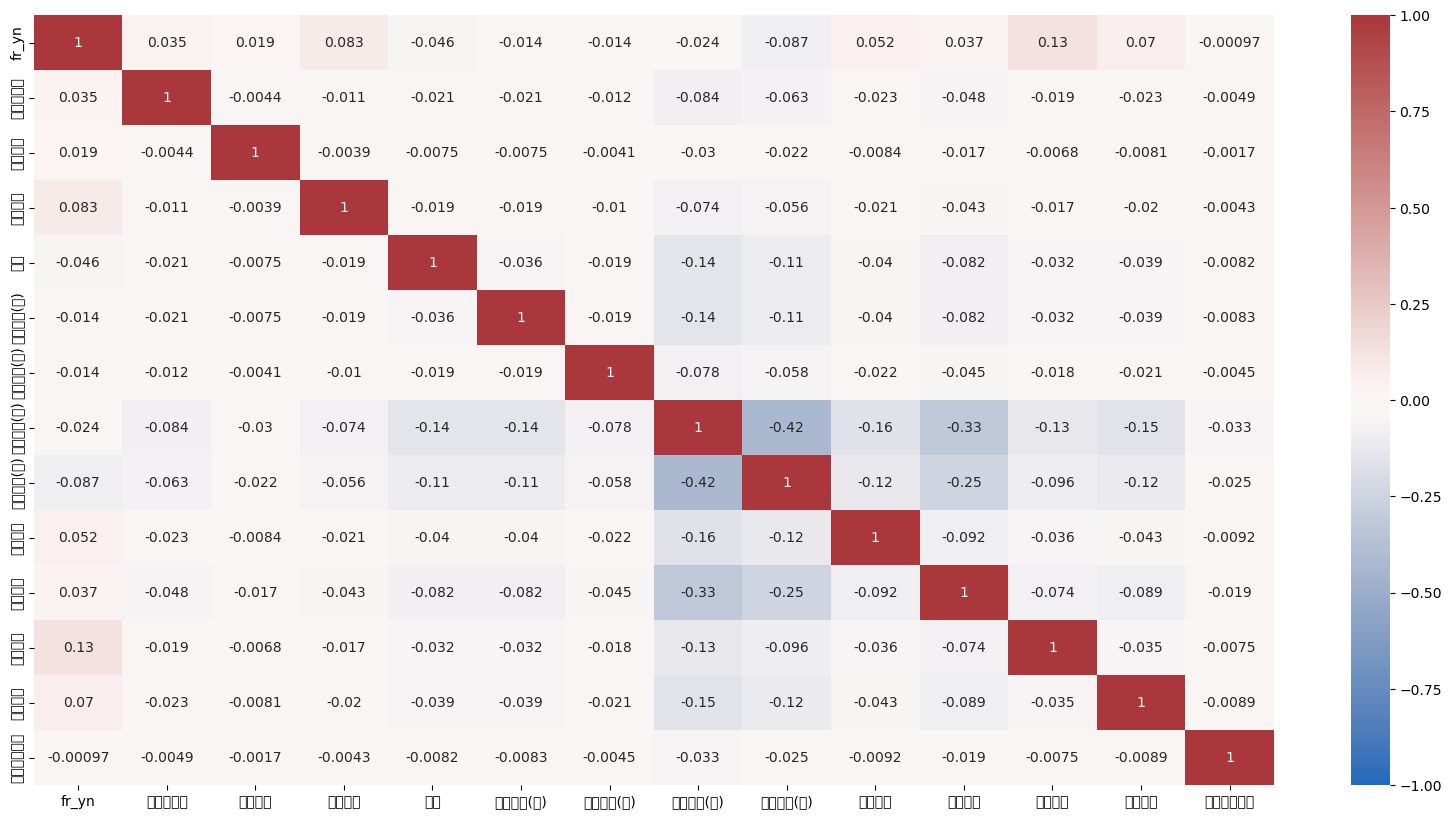

In [32]:
plt.figure(figsize=(20,10)) # 수치형 변수 Corr
sns.heatmap(sub_road.corr(),vmax=1,vmin=-1,annot=True,cmap='vlag')

In [31]:
from sklearn.preprocessing import LabelEncoder

print(sorted(set(sub4)))
encoder = LabelEncoder()
labels = encoder.fit_transform(sub4)
print(labels)

['bldng_ar_prc', 'fr_yn', 'rd_sd_nm']


ValueError: y should be a 1d array, got an array of shape (69054, 3) instead.

In [17]:
def replace_nan_with_zero_or_one(df, col_names):
    # df의 col_names 열들에서 NaN 값을 0으로 변환합니다.
    df.loc[:, col_names] = df.loc[:, col_names].fillna(-1)
    # 변환된 df에서 col_names 열들에서 0이 아닌 값은 1로 변환합니다.
    df.loc[:, col_names] = (df.loc[:, col_names] != -1).astype(int)
    # df에서 col_names 이외의 열들에서 0이 아닌 값은 1로 변환합니다.
    df.loc[:, ~df.columns.isin(col_names)] = (df.loc[:, ~df.columns.isin(col_names)] != 0).astype(int)
    return df
sub = replace_nan_with_zero_or_one(sub, ['isele', 'trgt_crtr', 'islw'])
sub.head()

,dt_of_fr,fr_yn,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,trgt_crtr,us_yn,set,isele,islw
0,1,1,1,1,1,1,0,1,1,0,...,0,1,1,1,1,0,1,1,1,0
1,1,1,1,1,1,1,0,1,1,0,...,0,1,1,1,1,0,1,1,0,0
2,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,1,1,0
3,1,1,1,1,1,1,0,1,1,0,...,0,1,1,1,1,0,1,1,1,0
4,1,1,1,1,0,0,0,1,1,1,...,0,1,1,1,1,0,1,1,0,0


In [40]:
sub['ttl_prc'] = sub['bldng_ar_prc']*sub['ttl_ar']
sub_prc = sub.drop(['dt_of_fr','bldng_archtctr',
 'bldng_cnt',
 'bldng_ar',
 'ttl_ar',
 'lnd_ar',
 'dt_of_athrztn',
 'ttl_grnd_flr',
 'ttl_dwn_flr',
 'bldng_us_clssfctn',
 'tmprtr',
 'wnd_spd',
 'wnd_drctn',
 'hmdt',
 'jmk',
 'id',
 'hm_cnt',
 'fr_sttn_dstnc','fr_wthr_fclt_dstnc',
 'fr_mn_cnt',
 'mlt_us_yn',
 'cctv_dstnc',
 'fr_wthr_fclt_in_100m',
 'cctv_in_100m',
 'tbc_rtl_str_dstnc',
 'sft_emrgnc_bll_dstnc',
 'ahsm_dstnc',
 'no_tbc_zn_dstnc',
 'trgt_crtr',
 'us_yn',
 'set',
 'isele',
 'islw'],axis = 1)

In [41]:
sub_prc.head(10)

,fr_yn,rd_sd_nm,bldng_ar_prc,ttl_prc
0,Y,세로한면(불),NaN,NaN
1,N,세로한면(가),122581.00000,5674274.49000
2,Y,중로한면,618105.00000,1555621939.80000
3,N,세로한면(불),719542.00000,35199994.64000
4,N,세로한면(불),NaN,NaN
5,Y,세로한면(가),899087.00000,133999926.48000
6,N,소로한면,NaN,NaN
7,N,소로한면,233594.00000,21499991.76000
8,N,소로한면,NaN,NaN
9,N,세로한면(가),NaN,NaN


In [46]:
sub_prc = sub_prc.replace({'Y': 1, 'N': 0},inplace = False)

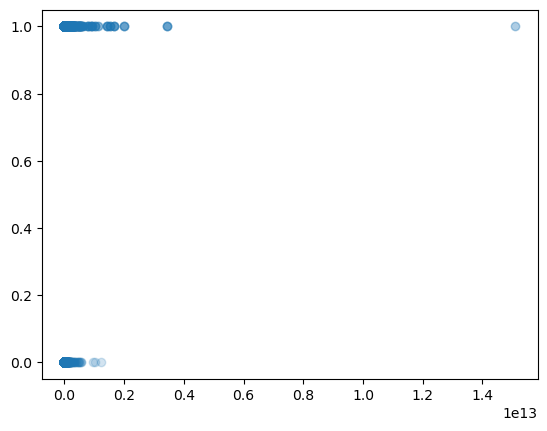

In [49]:
X = sub_prc['ttl_prc']
y = sub_prc['fr_yn']
plt.scatter(X,y, alpha =0.2)